Pick a dataset, as mentioned on the previous page.

Pose at least three questions related to business or real-world applications of how the data could be used.

Create a Jupyter Notebook, using any associated packages you'd like, to:

Prepare data:
Gather necessary data to answer your questions
Handle categorical and missing data
Provide insight into the methods you chose and why you chose them
Analyze, Model, and Visualize
Provide a clear connection between your business questions and how the data answers them
Communicate your business insights:
Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
Create a blog post to share your questions and insights with a non-technical audience


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns

In [3]:
reviews = pd.read_csv('seatle/reviews.csv')
calendar = pd.read_csv('seatle/calendar.csv')
listings = pd.read_csv('seatle/listings.csv')

In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [7]:
# convert dollar string to float
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
listings['weekly_price'] = listings['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
listings['monthly_price'] = listings['monthly_price'].replace('[\$,]', '', regex=True).astype(float)
listings['security_deposit'] = listings['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)



In [8]:

# convert percentage string to float
listings['host_response_rate'] = listings['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)


In [9]:
listings.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3295.000000,3045.000000,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,2009.000000,1517.000000,1866.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,94.886798,99.967159,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,127.976166,788.481832,2613.336190,287.610397,61.710904,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,11.866705,1.812201,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,90.250022,532.352269,1722.267981,270.222690,48.830341,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,17.000000,0.000000,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,100.000000,500.000000,95.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,98.000000,100.000000,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,75.000000,455.000000,1512.000000,150.000000,25.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,100.000000,100.000000,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,100.000000,650.000000,2200.000000,250.000000,50.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,100.000000,100.000000,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,950.000000,3150.000000,300.000000,83.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,100.000000,100.000000,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,1000.000000,6300.000000,19500.000000,5000.000000,300.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


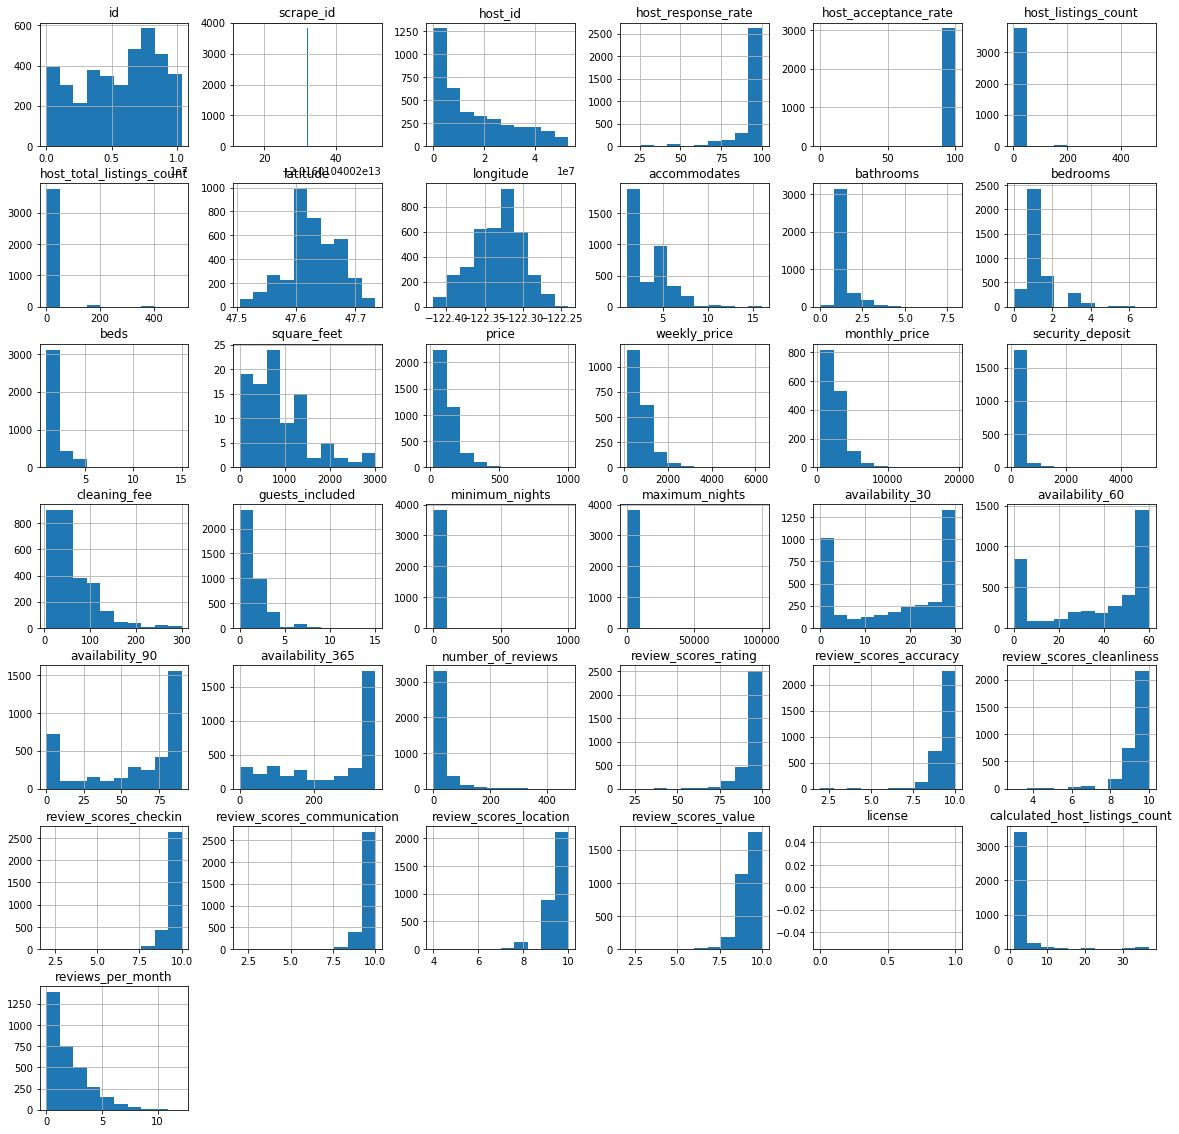

In [10]:
listings.hist(figsize=(20,20));

Questions:

As someone who works remotely, I've always wanted to work from Seatle for an extended period of time. But deciding where and when to go is always a tricky question for me. What are the different vibes for different neighbourhoods? What's the busist time of year of the city, how prices change with that? 

* Supplies in each neighbourbood
* Characteristics of neighbourhoods in seatle. 
    * Can you describe the vibe of each Seattle neighborhood using listing descriptions?
* What are the busiest times of the year to visit Seattle? By how much do prices spike?



# Supplies

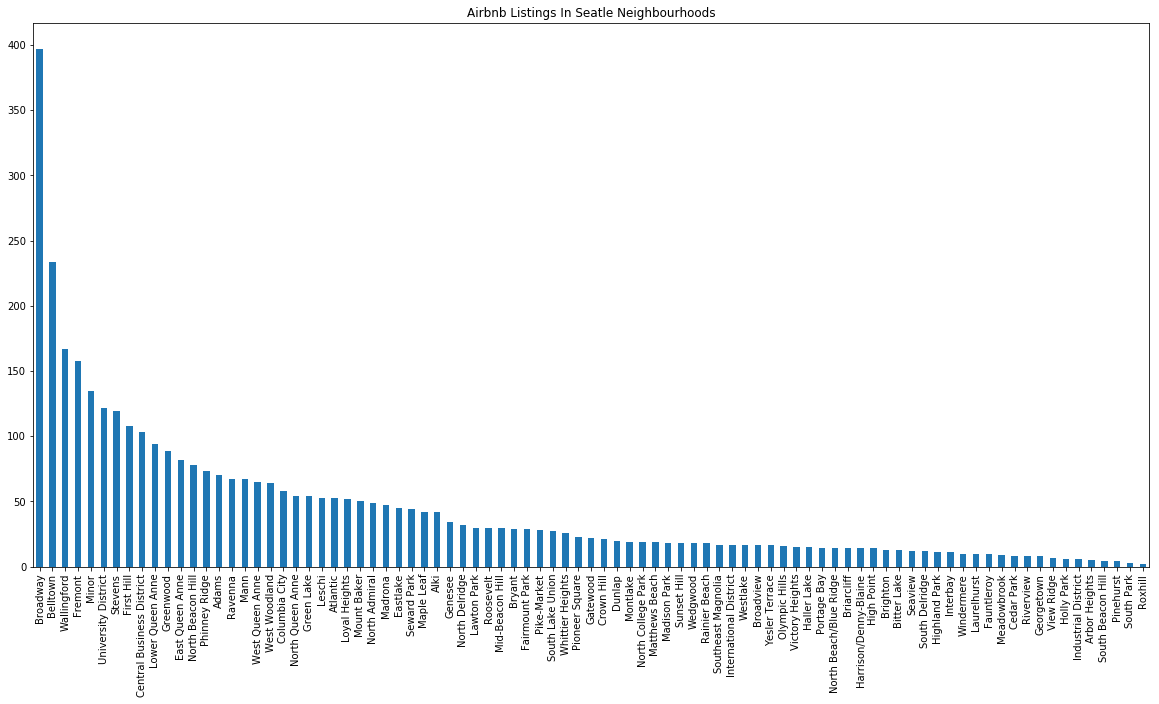

In [11]:
listings['neighbourhood_cleansed'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title('Airbnb Listings In Seatle Neighbourhoods');

Broadway and Belttown are the ones with largest supply. 

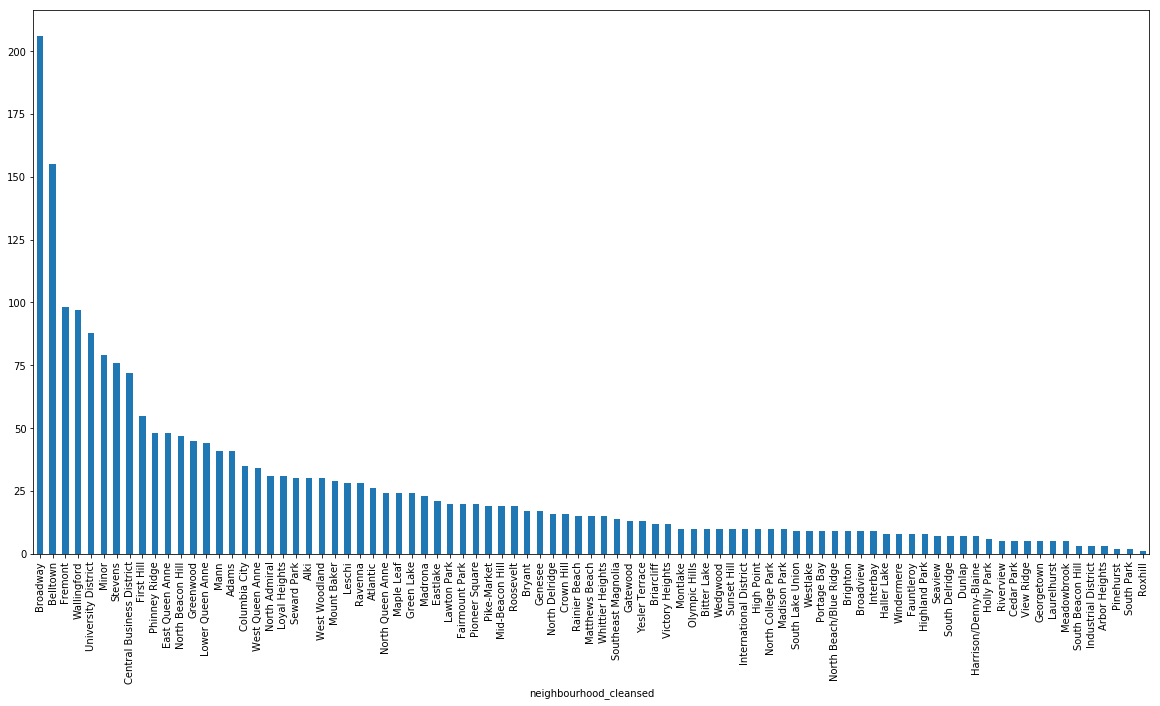

In [12]:
# Available listings - use availability 30> 0.5 
listings['availability_30_more_than_15'] = listings['availability_30']>15
listings.groupby('neighbourhood_cleansed').agg({'availability_30_more_than_15':'sum'}).sort_values(by='availability_30_more_than_15', ascending=False)['availability_30_more_than_15'].plot(kind='bar',figsize=(20,10))




Text(0.5, 1.0, 'Average Airbnb Availability In Next 30 Days')

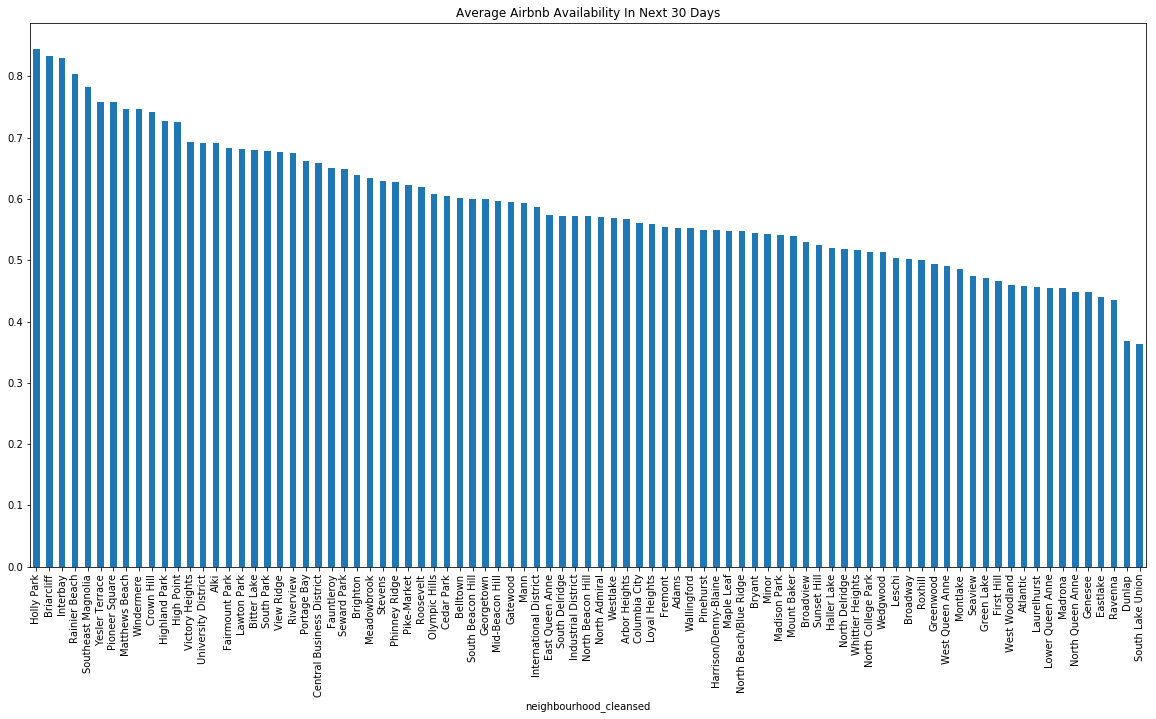

In [13]:
listings_avail = listings.groupby('neighbourhood_cleansed').agg({'availability_30':'mean'})/30
listings_avail.sort_values(by='availability_30', ascending=False)['availability_30'].plot(kind='bar',figsize=(20,10))

plt.title('Average Airbnb Availability In Next 30 Days')


# Prices

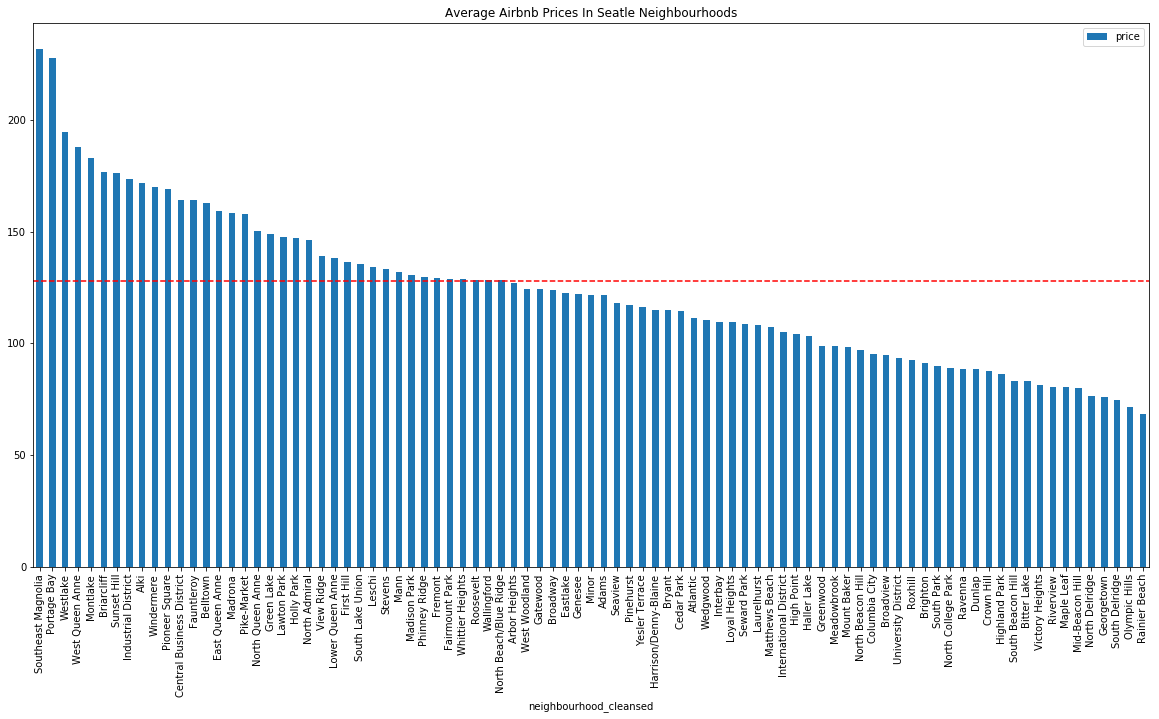

In [14]:
fig,ax=plt.subplots(figsize=(20,10))

listings.groupby(['neighbourhood_cleansed']).agg({'price':'mean'}).sort_values(by='price', ascending=False).plot(kind='bar',ax=ax)

city_average = listings['price'].mean()
# plot city average on chart
plt.axhline(y=city_average, color='r', linestyle='--',  label='City Average Price')
plt.title("Average Airbnb Prices In Seatle Neighbourhoods");


In [15]:
print(listings.groupby(['neighbourhood_cleansed']).agg({'price':'mean'}).max())
print(listings.groupby(['neighbourhood_cleansed']).agg({'price':'mean'}).min())



price    231.705882
dtype: float64
price    68.555556
dtype: float64


In [16]:
# check nulls
calendar.isnull().mean()

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [17]:
# Seasonality

calendar['date'] = pd.to_datetime(calendar['date'], format='%Y-%m-%d')
calendar['month'] = calendar['date'].dt.to_period('M')
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

calendar['is_weekend'] = calendar['date'].apply(lambda x: 1 if x.dayofweek in [5,6] else 0)

calendar['is_available'] = pd.get_dummies(calendar[['available']], columns=['available'], prefix=['available'])['available_t']


In [18]:
calendar.head()

,listing_id,date,available,price,month,is_weekend,is_available
0,241032,2016-01-04,t,85.0,2016-01,0,1
1,241032,2016-01-05,t,85.0,2016-01,0,1
2,241032,2016-01-06,f,NaN,2016-01,0,0
3,241032,2016-01-07,f,NaN,2016-01,0,0
4,241032,2016-01-08,f,NaN,2016-01,0,0


In [19]:
# availability = calendar.groupby('month').agg({'is_available':'mean'}).reset_index()
# availability.plot(x='month', y='is_available', kind='bar', figsize=(12,8))
# plt.title('Average Listing Availability By Month')

Listings availability reflects how listings are booked, higher the availability, the less listings are booked.
The calendar was scraped on 2016-01-04, so the chart is reflecting future availability on that day. 

We could see July is definitely a peak season.

Text(0.5, 1.0, 'Average Listing Prices By Month')

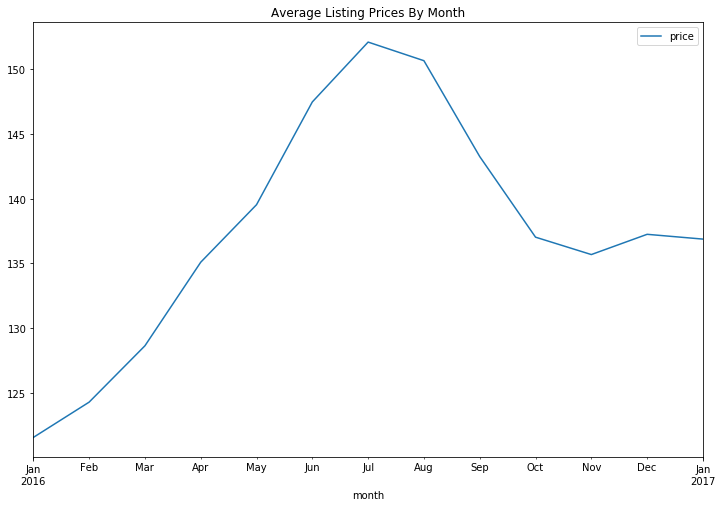

In [20]:
# Prices
availability = calendar.groupby('month').agg({'price':'mean'}).reset_index()
availability.plot(x='month', y='price', kind='line', figsize=(12,8))
plt.title('Average Listing Prices By Month')

Prices also peaks in July. Prices in the second half of year is higher than the first half. 

Text(0.5, 1.0, 'Airbnb Prices By Neighbourhood')

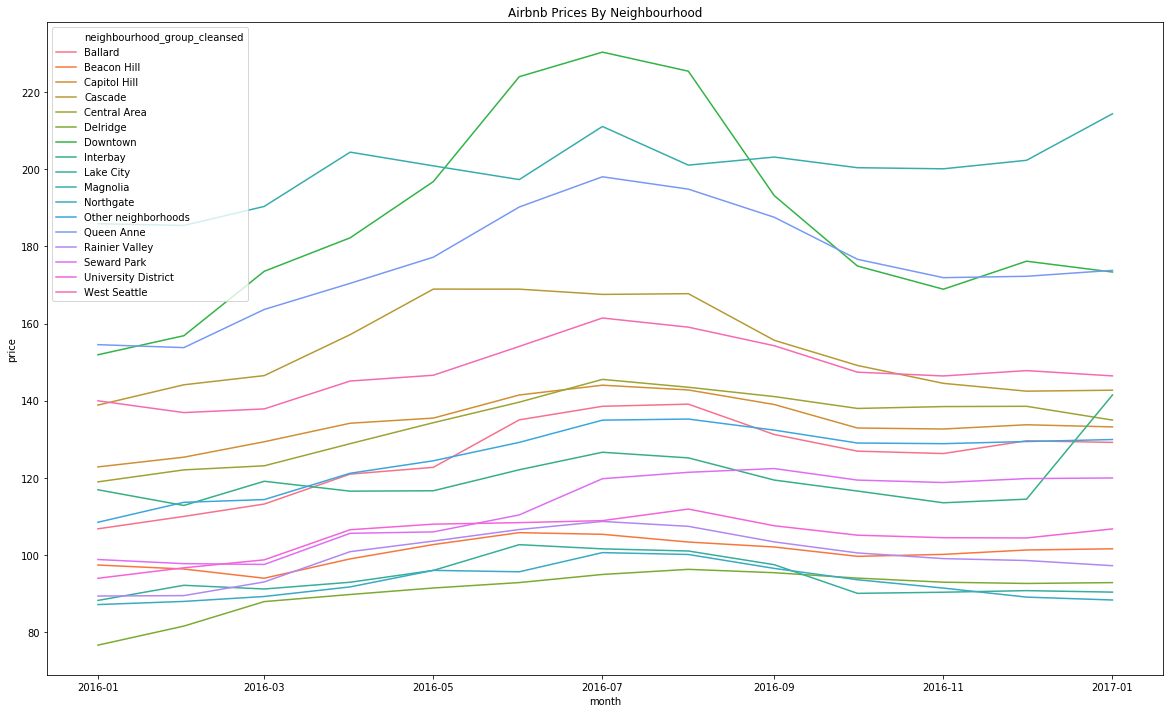

In [21]:
calendar2 = calendar.merge(listings[['id', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']], how='left', left_on='listing_id', right_on='id')
prices_agg = calendar2.groupby(['month', 'neighbourhood_group_cleansed']).agg({'price': 'mean'}).reset_index()
prices_agg['month'] = prices_agg['month'].apply(lambda x: x.start_time)
# prices_agg.head()
fig,ax=plt.subplots(figsize=(20,12))
sns.lineplot(data = prices_agg, x='month', y='price', hue='neighbourhood_group_cleansed', ax=ax)
plt.title('Airbnb Prices By Neighbourhood')

In [22]:
prices_agg.sort_values(by='price', ascending=False)

,month,neighbourhood_group_cleansed,price
108,2016-07-01,Downtown,230.343055
125,2016-08-01,Downtown,225.402173
91,2016-06-01,Downtown,223.974254
213,2017-01-01,Magnolia,214.371134
111,2016-07-01,Magnolia,211.078224
60,2016-04-01,Magnolia,204.425329
145,2016-09-01,Magnolia,203.150000
196,2016-12-01,Magnolia,202.312173
128,2016-08-01,Magnolia,201.063165
77,2016-05-01,Magnolia,200.872061


It's genuinely true for all neighbourhoods, but some neighbourhoods are less sensitive to seasonality. 

In [23]:
# weekly seasonality?

weekly_seasonality = calendar.groupby(['month', 'is_weekend']).agg({'price':'mean'}).reset_index().pivot_table(columns='is_weekend', index='month', values='price')
weekly_seasonality.rename({0:'Weekday', 1:'Weekend'}, axis=1, inplace=True)
weekly_seasonality['% Difference'] = weekly_seasonality['Weekend']/ weekly_seasonality['Weekday']-1

weekly_seasonality

is_weekend,Weekday,Weekend,% Difference
month,,,
2016-01,120.754001,123.581946,0.023419
2016-02,123.249671,127.040250,0.030755
2016-03,127.792072,131.089309,0.025802
2016-04,134.141484,137.347793,0.023902
2016-05,138.810376,141.316227,0.018052
2016-06,146.968422,148.867595,0.012922
2016-07,151.557614,153.222933,0.010988
2016-08,150.194369,151.983171,0.011910
2016-09,142.553225,145.193172,0.018519


Prices are generally more expensive on weekends

# Characteristics of Neighbourhoods

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [25]:
listings.neighborhood_overview

0                                                     NaN
1       Queen Anne is a wonderful, truly functional vi...
2       Upper Queen Anne is a charming neighborhood fu...
3                                                     NaN
4       We are in the beautiful neighborhood of Queen ...
                              ...                        
3813    We're located near lots of family fun. Woodlan...
3814    The neighborhood is a quiet oasis that is clos...
3815                                                  NaN
3816    Madison Park offers a peaceful slow pace upsca...
3817                                                  NaN
Name: neighborhood_overview, Length: 3818, dtype: object

In [26]:
listings.neighborhood_overview.isnull().mean()

0.27029858564693554

In [37]:
text_df = listings[['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'neighborhood_overview', 'description', 'host_about']].dropna()
# text['words'] = text['neighborhood_overview'].apply(lambda x: x.split(' '))
text_df['overview'] = text_df['neighborhood_overview'].apply(lambda x: x.lower())
text_df['description'] = text_df['description'].apply(lambda x: x.lower())
text_df['host_about'] = text_df['host_about'].apply(lambda x: x.lower())


In [56]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
neighbourhoods = list(text_df['neighbourhood_cleansed'].unique()) + list(text_df['neighbourhood_group_cleansed'].unique())

stopwords = stopwords.words('english')+['walk', 'walking', 'away', 'neighbourhood', 'neighborhood', 'seattle', 'distance', 'minute', 'url', 'hidden']
stemmer = SnowballStemmer("english")

def remove_neighbourhood_names(text):
    text = text.lower()
    for n in neighbourhoods:
        text = text.replace(n.lower(), '')
    return text
    
def remove_stopwords(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    
    #exclude stopwords from stemmed words
    #     stems = [stemmer.stem(t) for t in filtered_tokens if t not in stopwords]
    tokens = [t for t in filtered_tokens if t not in stopwords]

    return ' '.join(tokens)

def get_top_n_bigram(corpus, n=None): 
    '''
    A function for getting top bigrams of a text
    It takes a text corpus and a number n, and stop_words as input
    Returns top n bi-grams of from corpus with frequency excluding stop words
    '''
    vec = TfidfVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = {}
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def list_tuple_to_dict(input_list):
    output = dict()
    for i in input_list:
        output[i[0]] = i[1]
        
    return(output)

In [57]:
# remove neighbourhood name from overview
text_df['overview'] = text_df['overview'].apply(remove_neighbourhood_names)
text_df['overview'] = text_df['overview'].apply(lambda x: remove_stopwords(x))

In [58]:
text_df.head()

,neighbourhood_cleansed,neighbourhood_group_cleansed,neighborhood_overview,description,host_about,overview
1,West Queen Anne,Queen Anne,"Queen Anne is a wonderful, truly functional vi...",chemically sensitive? we've removed the irrita...,living east coast/left coast/overseas. time i...,wonderful truly functional village everywhere ...
2,West Queen Anne,Queen Anne,Upper Queen Anne is a charming neighborhood fu...,new modern house built in 2013. spectacular s...,i love living in seattle. i grew up in the mi...,upper charming full mix beautifully maintained...
4,West Queen Anne,Queen Anne,We are in the beautiful neighborhood of Queen ...,cozy family craftman house in beautiful neighb...,"hi, i live in seattle, washington but i'm orig...",beautiful 14th ave. w. whole foods market take...
5,West Queen Anne,Queen Anne,This part of Queen Anne has wonderful views an...,we're renting out a small private unit of one ...,i've been fortunate to have had many life expe...,part wonderful views quiet streets parking sev...
6,West Queen Anne,Queen Anne,"Close restaurants, coffee shops and grocery st...",enjoy a quiet stay in our comfortable 1915 cra...,we have lived in the the queen anne neighborho...,close restaurants coffee shops grocery stores ...


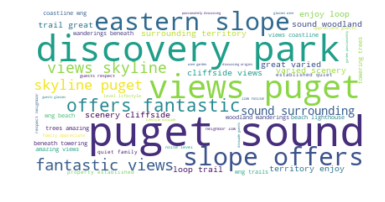

In [59]:
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
# generate word cloud
wordcloud = wc.generate_from_frequencies(list_tuple_to_dict(get_top_n_bigram(text_df[text_df['neighbourhood_cleansed']=='Southeast Magnolia']['overview'], n=50)))

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

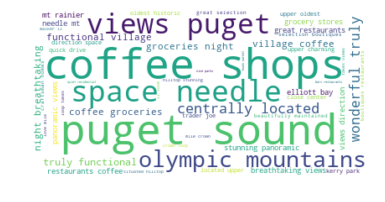

In [60]:
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
# generate word cloud
wordcloud = wc.generate_from_frequencies(list_tuple_to_dict(get_top_n_bigram(text_df[text_df['neighbourhood_cleansed']=='West Queen Anne']['overview'], n=50)))

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



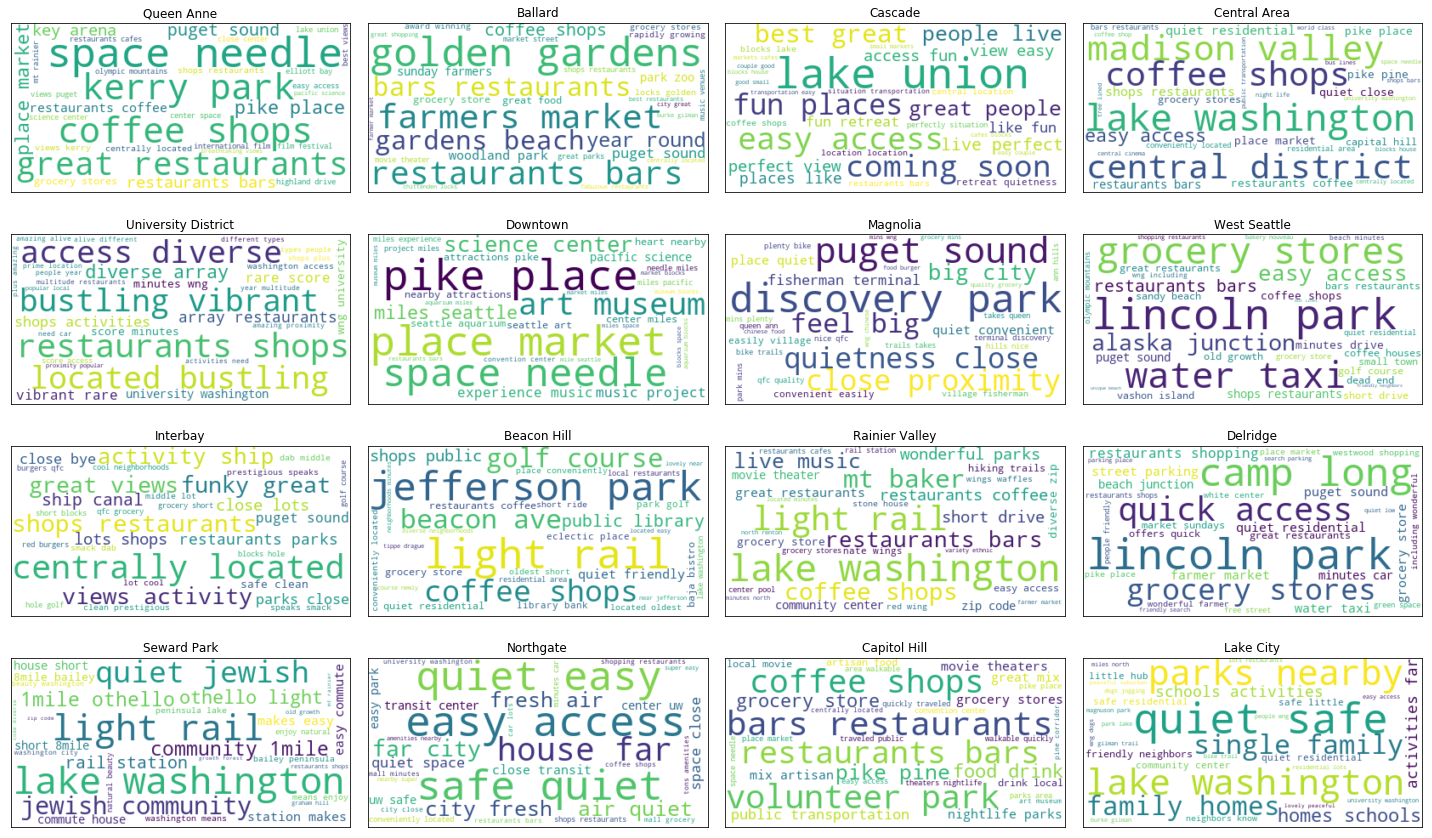

In [108]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,12),
                        subplot_kw={'xticks': [], 'yticks': []})

neighbourhoods = [n for n in neighbourhood_cleansed if n != 'Other neighborhoods']

for row in range(4):
    for col in range(4):
        neighbourhood = neighbourhoods[row*4+col]

        wordcloud = wc.generate_from_frequencies(list_tuple_to_dict(get_top_n_bigram(text_df[text_df['neighbourhood_group_cleansed']==neighbourhood]['overview'], n=30)))

        axes[row][col].imshow(wordcloud, interpolation="bilinear")
        axes[row][col].set_title(neighbourhood)

plt.tight_layout()
plt.show()



# Model price

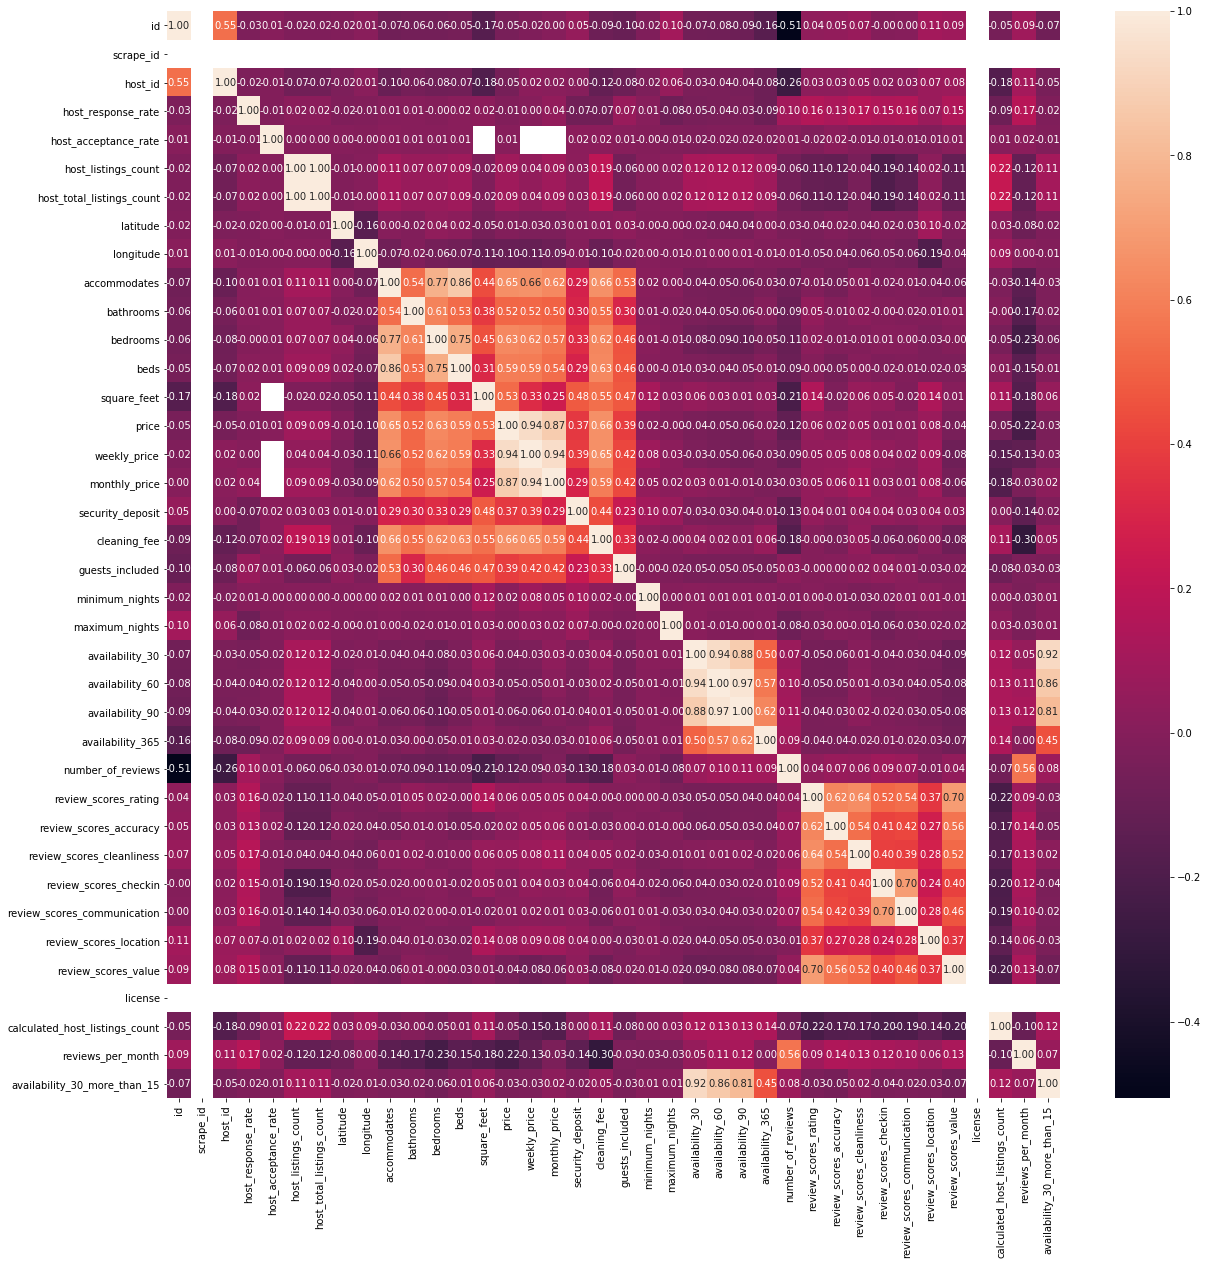

In [64]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(listings.corr(), fmt='.2f', annot=True, ax=ax)

In [65]:
listings.select_dtypes(include=['object']).columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',

In [66]:
listings.groupby(['property_type']).agg({'price':'mean', 'id':'count'})


,price,id
property_type,,
Apartment,122.932670,1708
Bed & Breakfast,112.054054,37
Boat,282.375000,8
Bungalow,115.615385,13
Cabin,104.666667,21
Camper/RV,120.461538,13
Chalet,98.500000,2
Condominium,151.109890,91
Dorm,39.500000,2


In [67]:
listings.groupby(['room_type']).agg({'price':'mean', 'id':'count'})

,price,id
room_type,,
Entire home/apt,155.843369,2541
Private room,75.044828,1160
Shared room,47.547009,117


In [68]:
listings['amenities'].head()

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [69]:
# number of amenities
listings['num_amenities'] = listings['amenities'].apply(lambda x: len(x.split(',')))


In [70]:
listings.groupby(['bed_type']).agg({'price':'mean', 'id':'count'})

,price,id
bed_type,,
Airbed,73.962963,27
Couch,64.307692,13
Futon,72.824324,74
Pull-out Sofa,77.276596,47
Real Bed,130.368882,3657


In [71]:
listings.groupby(['instant_bookable']).agg({'price':'mean', 'id':'count'})

,price,id
instant_bookable,,
f,129.200806,3227
t,121.289340,591


In [72]:
listings.groupby(['cancellation_policy']).agg({'price':'mean', 'id':'count'})

,price,id
cancellation_policy,,
flexible,109.534783,1150
moderate,114.775380,1251
strict,154.597036,1417


In [74]:
listings.isnull().mean()

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
summary                             0.046359
space                               0.149031
description                         0.000000
experiences_offered                 0.000000
neighborhood_overview               0.270299
notes                               0.420639
transit                             0.244631
thumbnail_url                       0.083814
medium_url                          0.083814
picture_url                         0.000000
xl_picture_url                      0.083814
host_id                             0.000000
host_url                            0.000000
host_name                           0.000524
host_since                          0.000524
host_location                       0.002095
host_about                          0.224987
host_respo

In [90]:
num_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'num_amenities'] # too many nulls in square_feet
cat_features = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type' ,'instant_bookable', 'cancellation_policy']
target = 'price'

model_df = listings[num_features + cat_features +[target]].copy()
model_df.head()

,accommodates,bathrooms,bedrooms,beds,guests_included,num_amenities,neighbourhood_cleansed,property_type,room_type,bed_type,instant_bookable,cancellation_policy,price
0,4,1.0,1.0,1.0,2,10,West Queen Anne,Apartment,Entire home/apt,Real Bed,f,moderate,85.0
1,4,1.0,1.0,1.0,1,16,West Queen Anne,Apartment,Entire home/apt,Real Bed,f,strict,150.0
2,11,4.5,5.0,7.0,10,21,West Queen Anne,House,Entire home/apt,Real Bed,f,strict,975.0
3,3,1.0,0.0,2.0,1,14,West Queen Anne,Apartment,Entire home/apt,Real Bed,f,flexible,100.0
4,6,2.0,3.0,3.0,6,13,West Queen Anne,House,Entire home/apt,Real Bed,f,strict,450.0


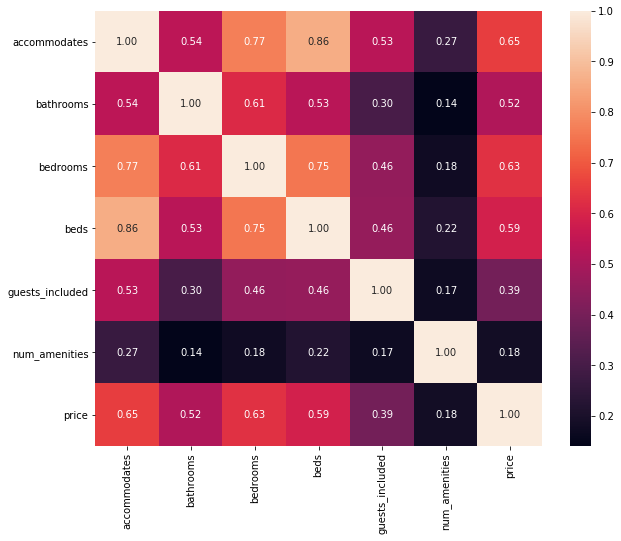

In [93]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(model_df.corr(), fmt='.2f', annot=True, ax=ax)

In [94]:
model_df[num_features].isnull().mean()

accommodates       0.000000
bathrooms          0.004191
bedrooms           0.001572
beds               0.000262
guests_included    0.000000
num_amenities      0.000000
dtype: float64

In [95]:
model_df[cat_features].isnull().mean()

neighbourhood_cleansed    0.000000
property_type             0.000262
room_type                 0.000000
bed_type                  0.000000
instant_bookable          0.000000
cancellation_policy       0.000000
dtype: float64

In [96]:
for f in num_features:
    if model_df[[f]].isnull().mean()[f]>0:
        # fill with mean
        model_df[f].fillna(model_df[f].mean(), inplace=True)

In [97]:
# one hot encoding for categorical features
encoded_cat_features = [] # to capture new names
for c in cat_features:
    dummies_df = pd.get_dummies(model_df[c], drop_first=True, prefix=c)
    encoded_cat_features = encoded_cat_features + list(dummies_df.columns)
    model_df.drop(columns=c, inplace=True)
    model_df = pd.concat([model_df, dummies_df], axis=1)

In [98]:
model_df.head()

,accommodates,bathrooms,bedrooms,beds,guests_included,num_amenities,price,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Genesee,neighbourhood_cleansed_Georgetown,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Haller Lake,neighbourhood_cleansed_Harrison/Denny-Blaine,neighbourhood_cleansed_High Point,neighbourhood_cleansed_Highland Park,neighbourhood_cleansed_Holly Park,neighbourhood_cleansed_Industrial District,neighbourhood_cleansed_Interbay,neighbourhood_cleansed_International District,neighbourhood_cleansed_Laurelhurst,neighbourhood_cleansed_Lawton Park,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beach/Blue Ridge,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North College Park,neighbourhood_cleansed_North Delridge,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict
0,4,1.0,1.0,1.0,2,10,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,4,1.0,1.0,1.0,1,16,150.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [99]:
X =  model_df[num_features + encoded_cat_features]
y = model_df[target]

In [100]:
print(X.shape, y.shape)

(3818, 116) (3818,)


In [101]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

(2863, 116) (955, 116)


In [102]:
# use a linear model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
r2_score(y_test, y_pred)

0.5766999775293071

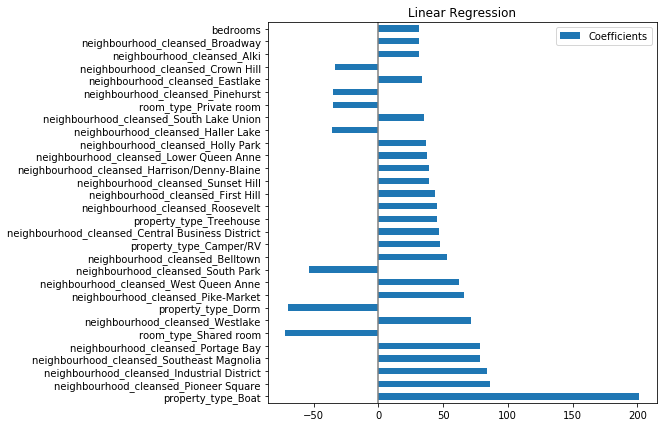

In [103]:

coefs = pd.DataFrame(
    lm.coef_, columns=["Coefficients"], index=X_train.columns
)

top_features = abs(coefs['Coefficients']).sort_values(ascending=False)[:30].index

coefs.loc[top_features].plot(kind="barh", figsize=(9, 7))
plt.title("Linear Regression")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)


In [104]:
abs(coefs['Coefficients']).sort_values(ascending=False)[:20].index

Index(['property_type_Boat', 'neighbourhood_cleansed_Pioneer Square',
       'neighbourhood_cleansed_Industrial District',
       'neighbourhood_cleansed_Southeast Magnolia',
       'neighbourhood_cleansed_Portage Bay', 'room_type_Shared room',
       'neighbourhood_cleansed_Westlake', 'property_type_Dorm',
       'neighbourhood_cleansed_Pike-Market',
       'neighbourhood_cleansed_West Queen Anne',
       'neighbourhood_cleansed_South Park', 'neighbourhood_cleansed_Belltown',
       'property_type_Camper/RV',
       'neighbourhood_cleansed_Central Business District',
       'property_type_Treehouse', 'neighbourhood_cleansed_Roosevelt',
       'neighbourhood_cleansed_First Hill',
       'neighbourhood_cleansed_Sunset Hill',
       'neighbourhood_cleansed_Harrison/Denny-Blaine',
       'neighbourhood_cleansed_Lower Queen Anne'],
      dtype='object')